In [124]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from imageio import imread
import sys

In [149]:
def binary_to_eig(image):
    rot_image = np.rot90(image,k=-1)
    idx = np.argwhere(rot_image)
    return idx[:,0] + 1j*idx[:,1]

def grayscale_to_eig(image):
    rot_image = np.rot90(image,k=-1)
    rows,cols = np.unravel_index(np.argsort(rot_image,axis=None),shape=rot_image.shape)
    colors = np.sort(A.flatten())
    return rows + 1j*cols, colors

def grayscale_to_coords(image):
    rot_image = np.rot90(image,k=-1)
    rows,cols = np.unravel_index(np.argsort(rot_image,axis=None),shape=rot_image.shape)
    colors = np.sort(image.flatten())
    return rows+.5,cols+.5,colors

In [127]:
img1 = imread("test_image.jpg")/256

In [30]:
A = np.array([[.1,0,0,1,0],
              [.2,.5,0,.7,0],
              [.2,0,.5,.7,0],
              [.1,0,0,1,0]])

In [111]:
A2 = np.array([[.1,0,0,1,0],
               [.2,.5,0,.7,0],
               [.2,0,.5,.7,0],
               [.1,0,0,1,0],
               [.1,0,0,1,0],
               [.1,0,0,1,0]])

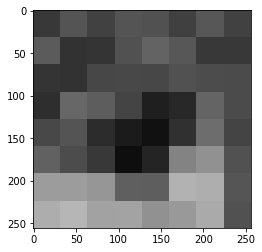

In [147]:
plt.imshow(img1,cmap="gray",vmin=0,vmax=1)
plt.show()

In [148]:
np.array(img1)

array([[0.21875   , 0.21875   , 0.21875   , ..., 0.25390625, 0.25390625,
        0.25390625],
       [0.21875   , 0.21875   , 0.21875   , ..., 0.25390625, 0.25390625,
        0.25390625],
       [0.21875   , 0.21875   , 0.21875   , ..., 0.25390625, 0.25390625,
        0.25390625],
       ...,
       [0.67578125, 0.67578125, 0.67578125, ..., 0.31640625, 0.31640625,
        0.31640625],
       [0.67578125, 0.67578125, 0.67578125, ..., 0.31640625, 0.31640625,
        0.31640625],
       [0.67578125, 0.67578125, 0.67578125, ..., 0.31640625, 0.31640625,
        0.31640625]])

In [42]:
rows,cols = np.unravel_index(np.argsort(A,axis=None),shape=A.shape)
for i in range(len(rows)):
    print(A[rows[i],cols[i]])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1
0.1
0.2
0.2
0.5
0.5
0.7
0.7
1.0
1.0


In [36]:
np.sort(A.flatten())

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.2,
       0.2, 0.5, 0.5, 0.7, 0.7, 1. , 1. ])

In [37]:
A.flatten()

array([0.1, 0. , 0. , 1. , 0. , 0.2, 0.5, 0. , 0.7, 0. , 0.2, 0. , 0.5,
       0.7, 0. , 0.1, 0. , 0. , 1. , 0. ])

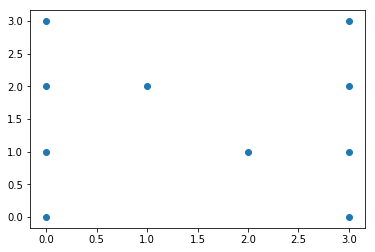

In [18]:
plt.scatter(eig.real,eig.imag)
plt.show()

In [47]:
np.linspace([0,0],[1,2],10).astype("str")

array([['0.0', '0.0'],
       ['0.1111111111111111', '0.2222222222222222'],
       ['0.2222222222222222', '0.4444444444444444'],
       ['0.3333333333333333', '0.6666666666666666'],
       ['0.4444444444444444', '0.8888888888888888'],
       ['0.5555555555555556', '1.1111111111111112'],
       ['0.6666666666666666', '1.3333333333333333'],
       ['0.7777777777777777', '1.5555555555555554'],
       ['0.8888888888888888', '1.7777777777777777'],
       ['1.0', '2.0']], dtype='<U32')

In [ ]:
np.linspace([0,0],[1,2],10).as

In [150]:
rows,cols,colors = grayscale_to_coords(img1)

In [117]:
rows.shape

(30,)

In [151]:
pixels = img1.shape[1]
pixels_per_inch = pixels/6.4
size = 72/pixels_per_inch

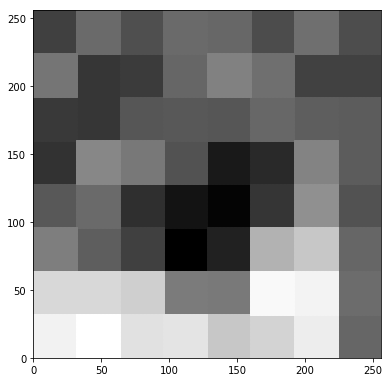

In [152]:
aspect_ratio = img1.shape[0]/img1.shape[1]
fig = plt.figure(figsize=(6.4,aspect_ratio*6.4))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
plt.xlim((0,img1.shape[1]))
plt.ylim((0,img1.shape[0]))
plt.scatter(rows,cols,s=size**2,c=colors, cmap="gray",marker='s')
plt.show()

In [57]:
plt.rcParams['lines.markersize']

6.0

In [73]:
ratio = A.shape[0]/A.shape[1]

In [74]:
ratio

0.8

In [209]:
def animate_pixels(img1,img2,filename):
    rows1,cols1,colors1 = grayscale_to_coords(img1)
    rows2,cols2,colors2 = grayscale_to_coords(img2)
    aspect_ratio = img1.shape[0]/img1.shape[1]
    plt.ioff()
    fig = plt.figure(figsize=(6.4,aspect_ratio*6.4))
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")
    plt.axis("off")
    plt.xlim((0,img1.shape[1]))
    plt.ylim((0,img1.shape[0]))
    pixels = img1.shape[1]
    pixels_per_inch = pixels/6.4
    size = 72/pixels_per_inch
    points = ax.scatter(rows1,cols1,c=colors1,cmap="gray",marker='s',s=size**2,vmin=0,vmax=1)
    
    n=300
    buffer = 30
    colors = np.linspace(colors1,colors2,n)
    rows = np.linspace(rows1,rows2,n)
    cols = np.linspace(cols1,cols2,n)
    pos = np.dstack((rows,cols))
    
    def update(j):
        if j >= buffer and j < buffer+n:
            i = j-buffer
            points.set_offsets(pos[i])
            points.set_offsets(colors[i])
        elif j >= 3*buffer+n and j < 3*buffer+2*n:
            i = n-(j-(3*buffer+n))-1
            points.set_offsets(pos[i])
            points.set_offsets(colors[i])
#         if j >= buffer and j < 3*buffer+2*n:
#             i = j-buffer
#             points.set_offsets(np.array([(1-t[i])*rows1+t[i]*rows2,(1-t[i])*cols1+t[i]*cols2]).T)
#             points.set_array(colors[i])

    
    ani = animation.FuncAnimation(fig,update,frames=2*n+4*buffer,interval=30)
    ani.save(filename)
    plt.close(fig)
    plt.ion()

In [177]:
img1 = np.array(imread("camera2.png",as_gray=True))/256
img2 = np.array(imread("lena.png",as_gray=True))/256

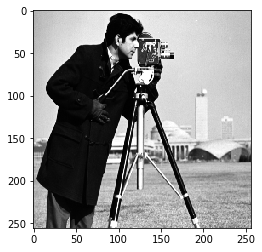

In [179]:
plt.imshow(img1,cmap="gray")
plt.show()

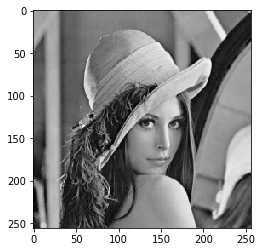

In [180]:
plt.imshow(img2,cmap="gray")
plt.show()

OSError: [Errno 12] Cannot allocate memory

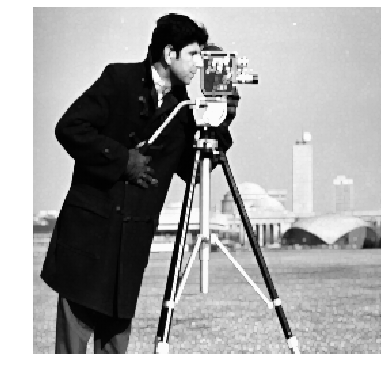

In [210]:
animate_pixels(img1,img2,"mixing2.mp4")

In [174]:
grayscale_to_coords(img1)

(array([140.5, 112.5, 136.5, ..., 121.5, 135.5,  93.5]),
 array([152.5, 117.5, 163.5, ...,  95.5, 159.5,  80.5]),
 array([0.        , 0.        , 0.        , ..., 0.99609375, 0.99609375,
        0.99609375], dtype=float32))

In [163]:
np.unravel_index(np.argsort(np.rot90(img1,k=-1),axis=None),shape=img1.s

array([26044, 26043, 92290, ..., 68413, 92043, 86097])

In [165]:
img1.shape

(225, 225, 3)

In [181]:
img1.shape,img2.shape

((256, 256), (256, 256))

In [184]:
t = np.linspace(0,1,5)
np.concatenate((t,t[::-1]))

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.  , 0.75, 0.5 , 0.25, 0.  ])

In [194]:
n = 300
rows1,cols1,colors1 = grayscale_to_coords(img1)
rows2,cols2,colors2 = grayscale_to_coords(img2)

In [197]:
rows = np.linspace(rows1,rows2,n)
cols = np.linspace(cols1,cols2,n)

In [204]:
pos = np.dstack((rows,cols))

In [214]:
import sys
sys.getsizeof(pos[0])

112

In [208]:
rows1,cols1

(array([108.5, 108.5, 116.5, ..., 131.5, 118.5, 103.5]),
 array([134.5, 135.5, 150.5, ..., 175.5,  99.5,  93.5]))